In [ ]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

In [2]:
data.describe()

stop_id      exp_years   stopduration  stop_in_response_to_cfs  \
count  653601.000000  653601.000000  653601.000000            653601.000000   
mean   298190.035073       6.269925      28.673766                 0.105159   
std    168868.612621       7.145313      50.364599                 0.306758   
min      2443.000000       1.000000       1.000000                 0.000000   
25%    154615.000000       1.000000      10.000000                 0.000000   
50%    299672.000000       3.000000      15.000000                 0.000000   
75%    443502.000000      10.000000      30.000000                 0.000000   
max    590817.000000      50.000000    1440.000000                 1.000000   

       officer_assignment_key  address_block       isschool           beat  \
count           653601.000000   5.800590e+05  653601.000000  653600.000000   
mean                 1.410181   6.661789e+03       0.000718     509.863126   
std                  1.769555   2.949463e+05       0.026778     244.543118   
min                  1.000000   0.000000e+00       0.000000     111.000000   
25%                  1.000000   1.300000e+03       0.000000     315.000000   
50%                  1.000000   3.200000e+03       0.000000     521.000000   
75%                  1.000000   4.800000e+03       0.000000     712.000000   
max                 10.000000   9.999990e+07       1.000000     999.000000   

                 pid      isstudent  perceived_limited_english  perceived_age  \
count  653601.000000  653601.000000              653601.000000  653601.000000   
mean        1.224706       0.000395                   0.021544      37.113782   
std         1.043548       0.019864                   0.145188      13.384586   
min         1.000000       0.000000                   0.000000       1.000000   
25%         1.000000       0.000000                   0.000000      26.000000   
50%         1.000000       0.000000                   0.000000      35.000000   
75%         1.000000       0.000000                   0.000000      45.000000   
max        52.000000       1.000000                   1.000000     120.000000   

       gender_nonconforming           gend  gend_nc  
count         653601.000000  653601.000000    379.0  
mean               0.000580       1.275255      5.0  
std                0.024073       0.459053      0.0  
min                0.000000       0.000000      5.0  
25%                0.000000       1.000000      5.0  
50%                0.000000       1.000000      5.0  
75%                0.000000       2.000000      5.0  
max                1.000000       4.000000      5.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653601 entries, 0 to 653600
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   stop_id                    653601 non-null  int64  
 1   ori                        653601 non-null  object 
 2   agency                     653601 non-null  object 
 3   exp_years                  653601 non-null  int64  
 4   date_stop                  653601 non-null  object 
 5   time_stop                  653601 non-null  object 
 6   stopduration               653601 non-null  int64  
 7   stop_in_response_to_cfs    653601 non-null  int64  
 8   officer_assignment_key     653601 non-null  int64  
 9   assignment                 653601 non-null  object 
 10  intersection               68881 non-null   object 
 11  address_block              580059 non-null  float64
 12  land_mark                  67 non-null      object 
 13  address_street             62

In [4]:
# Check for duplicates
print(data.duplicated().sum())

0


In [5]:
data['perceived_gender'] = data['perceived_gender'].fillna('non_identifier')

In [6]:
data.drop(['stop_id','ori','agency','officer_assignment_key','assignment','intersection','intersection','address_block','land_mark','address_street','highway_exit','school_name','beat','gend_nc'], axis=1, inplace=True)

In [7]:
# Convert date_stop and time_stop to datetime format
data['date_stop'] = pd.to_datetime(data['date_stop'])
data['day_of_week'] = data['date_stop'].dt.dayofweek

# Split the date_stop column into separate year, month, and day columns
data['year_stop'] = pd.to_datetime(data['date_stop']).dt.year
data['month_stop'] = pd.to_datetime(data['date_stop']).dt.month
data['day_stop'] = pd.to_datetime(data['date_stop']).dt.day


# Drop the original time_stop column
data.drop('date_stop', axis=1, inplace=True)

In [8]:
# Convert time_stop to datetime format
data['time_stop'] = data['time_stop'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S', errors='coerce'))
data['hour_of_day'] = data['time_stop'].dt.hour

# Drop the original time_stop column
data.drop('time_stop', axis=1, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder object
encoder = LabelEncoder()

# Encode the categorical data
data['address_city_encoded'] = encoder.fit_transform(data['address_city'].astype(str))
data['beat_name_encoded'] = encoder.fit_transform(data['beat_name'].astype(str))

data.drop(['address_city', 'beat_name'], axis=1, inplace=True)

In [11]:
# Convert perceived_gender to one-hot encoding
#data = pd.concat([data, pd.get_dummies(data['perceived_gender'], prefix='perceived_gender')], axis=1)

data.drop(['gend', 'gender_nonconforming'], axis=1, inplace=True)

In [12]:
# Convert "yes" or "no" values to 1 or 0, respectively
data['perceived_lgbt'] = data['perceived_lgbt'].map({'yes': 1, 'no': 0})
data.drop(['perceived_lgbt'], axis=1, inplace=True)

In [13]:
missing_values = data.isna().sum()
print(missing_values)

exp_years                     0
stopduration                  0
stop_in_response_to_cfs       0
isschool                      0
pid                           0
isstudent                     0
perceived_limited_english     0
perceived_age                 0
perceived_gender              0
gender_nonconforming          0
day_of_week                   0
year_stop                     0
month_stop                    0
day_stop                      0
hour_of_day                  92
address_city_encoded          0
beat_name_encoded             0
dtype: int64


In [14]:
data = data.dropna()

In [15]:
missing_values = data.isna().sum()
print(missing_values)

exp_years                    0
stopduration                 0
stop_in_response_to_cfs      0
isschool                     0
pid                          0
isstudent                    0
perceived_limited_english    0
perceived_age                0
perceived_gender             0
gender_nonconforming         0
day_of_week                  0
year_stop                    0
month_stop                   0
day_stop                     0
hour_of_day                  0
address_city_encoded         0
beat_name_encoded            0
dtype: int64


In [16]:
pd.DataFrame(data).to_csv('clean_data.csv', index=False)

In [1]:
import pandas as pd
data = pd.read_csv("clean_data.csv").sample(frac=0.1) # Sampling due to memory constraints when clustering
data.head()

exp_years  stopduration  stop_in_response_to_cfs  isschool  pid   
170810          1            10                        0         0    2  \
387047          6            10                        0         0    1   
498875          1            90                        0         0    1   
267723          1            50                        0         0    1   
340811         10            10                        0         0    1   

        isstudent  perceived_limited_english  perceived_age perceived_gender   
170810          0                          0             40           Female  \
387047          0                          0             25           Female   
498875          0                          0             34             Male   
267723          0                          0             30             Male   
340811          0                          0             24             Male   

        day_of_week  year_stop  month_stop  day_stop  hour_of_day   
170810            0       2019          11        25         12.0  \
387047            3       2021           3        11         10.0   
498875            6       2021          12        26         11.0   
267723            2       2020           6         3          8.0   
340811            1       2020          11        24         11.0   

        address_city_encoded  beat_name_encoded  
170810                    42                 75  
387047                    42                 84  
498875                    42                 91  
267723                    42                 56  
340811                    42                 78

In [25]:
data.nunique()

exp_years                     36
stopduration                 205
stop_in_response_to_cfs        2
isschool                       2
pid                           36
isstudent                      2
perceived_limited_english      2
perceived_age                 98
perceived_gender               5
day_of_week                    7
year_stop                      5
month_stop                    12
day_stop                      31
hour_of_day                   24
address_city_encoded          31
beat_name_encoded            127
dtype: int64

In [2]:
from sklearn.model_selection import train_test_split
import pickle

X = data.copy()
X.pop('perceived_gender')
y = data['perceived_gender'].copy()

train, test = train_test_split(data, test_size=0.3, random_state=1)
with open('train_data_original.pickle', 'wb') as f:
    pickle.dump(train.reset_index(drop=True), f)
    
with open('test_data_original.pickle', 'wb') as f:
    pickle.dump(test.reset_index(drop=True), f)

In [4]:
import pickle
with open('train_data_original.pickle', 'rb') as f:
    X_train = pickle.load(f)
    y_train = X_train['perceived_gender']
    X_train = X_train.drop('perceived_gender', axis=1)

with open('test_data_original.pickle', 'rb') as f:
    X_test = pickle.load(f)
    y_test = X_test['perceived_gender']
    X_test = X_test.drop('perceived_gender', axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize the data
scaler_norm = MinMaxScaler()
train_data_norm = scaler_norm.fit_transform(X_train)
test_data_norm = scaler_norm.transform(X_test)

train_data_norm = pd.DataFrame(train_data_norm)
train_data_norm['perceived_gender'] = y_train
test_data_norm = pd.DataFrame(test_data_norm)
test_data_norm['perceived_gender'] = y_test

# Standardize the data
scaler_std = StandardScaler()
train_data_std = scaler_std.fit_transform(X_train)
test_data_std = scaler_std.transform(X_test)

train_data_std = pd.DataFrame(train_data_std)
train_data_std['perceived_gender'] = y_train
test_data_std = pd.DataFrame(test_data_std)
test_data_std['perceived_gender'] = y_test

# Save the normalized and standardized data as pickle files
with open('train_data_norm.pickle', 'wb') as f:
    pickle.dump(train_data_norm, f)
    
with open('test_data_norm.pickle', 'wb') as f:
    pickle.dump(test_data_norm, f)

with open('train_data_std.pickle', 'wb') as f:
    pickle.dump(train_data_std, f)
    
with open('test_data_std.pickle', 'wb') as f:
    pickle.dump(test_data_std, f)

In [8]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


import pickle
with open('train_data_original.pickle', 'rb') as f:
    train = pickle.load(f)

with open('test_data_original.pickle', 'rb') as f:
    test = pickle.load(f)


# Get the counts of each class
class_counts = train['perceived_gender'].value_counts()

# Get the maximum and minimum count for resampling
max_count = class_counts.max()
min_count = class_counts.min()

# Initialize empty DataFrame for the resampled data
df_downsampling = pd.DataFrame()
df_upsampling = pd.DataFrame()

# Loop through each class and resample
for class_value, count in class_counts.items():
    df_class = train[train['perceived_gender'] == class_value]

    # Downsample
    df_class_downsampled = resample(df_class,
                                    replace=False,
                                    n_samples=min_count,
                                    random_state=0)
    df_downsampling = pd.concat([df_downsampling, df_class_downsampled])

    # Upsample
    df_class_upsampled = resample(df_class,
                                  replace=True,
                                  n_samples=max_count,
                                  random_state=0)
    df_upsampling = pd.concat([df_upsampling, df_class_upsampled])

X = train.copy()
X.pop('perceived_gender')
y = train['perceived_gender'].copy()

# Apply SMOTE to the data
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

# Create a new pandas DataFrame with the rebalanced data
df_res = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['perceived_gender'])], axis=1)

data_sampling_strategies = {'downsampled': df_downsampling,
                   'upsampled': df_upsampling,
                   'smote': df_res}

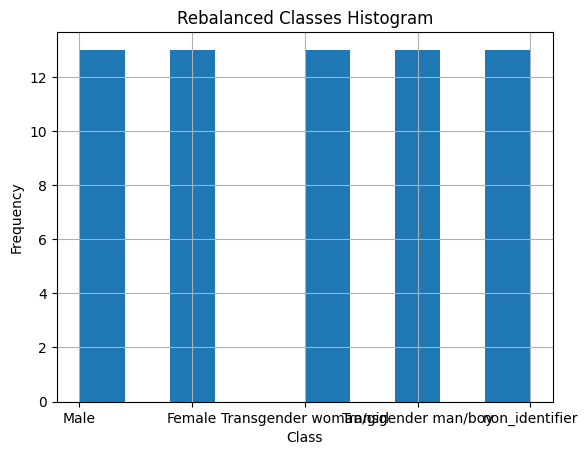

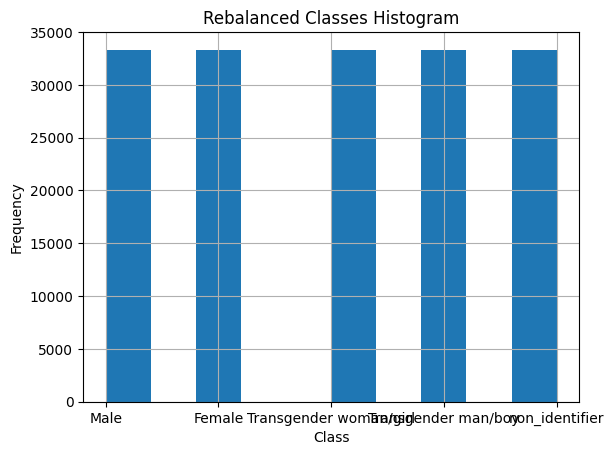

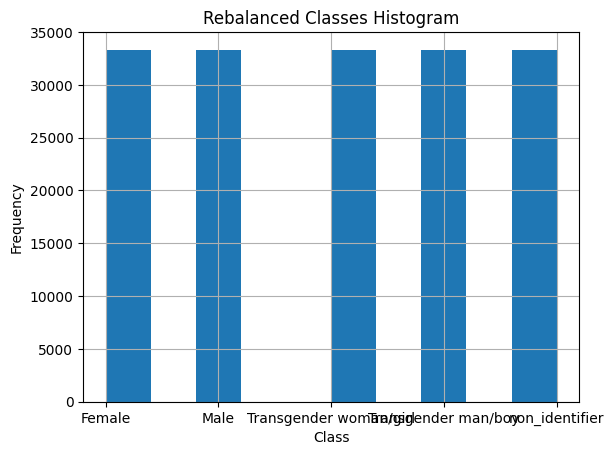

In [9]:
import matplotlib.pyplot as plt

for strategy in data_sampling_strategies:
    # Plot the rebalanced classes
    data_sampling_strategies[strategy]['perceived_gender'].hist()
    plt.title('Rebalanced Classes Histogram')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

In [10]:
for strategy in data_sampling_strategies:
    splits = {'train': data_sampling_strategies[strategy].reset_index(drop=True), 'test': test.reset_index(drop=True)}
    for split in splits:
        with open(f'{split}_data_{strategy}.pickle', 'wb') as f:
            pickle.dump(splits[split], f)

In [17]:
from sklearn.decomposition import PCA

dataset_name = "std"

with open(f'train_data_{dataset_name}.pickle', 'rb') as f:
    X_train = pickle.load(f)
    y_train = X_train['perceived_gender']
    X_train = X_train.drop('perceived_gender', axis=1)
    
with open(f'test_data_{dataset_name}.pickle', 'rb') as f:
    X_test = pickle.load(f)
    y_test = X_test['perceived_gender']
    X_test = X_test.drop('perceived_gender', axis=1)

pca = PCA(n_components=0.95)
train_data_pca = pca.fit_transform(X_train)
test_data_pca = pca.transform(X_test)

In [18]:
explained_variances = pca.explained_variance_ratio_
cumulative_explained_variance = []
cumulative = 0
for variance in explained_variances:
    cumulative += variance
    cumulative_explained_variance.append(cumulative)

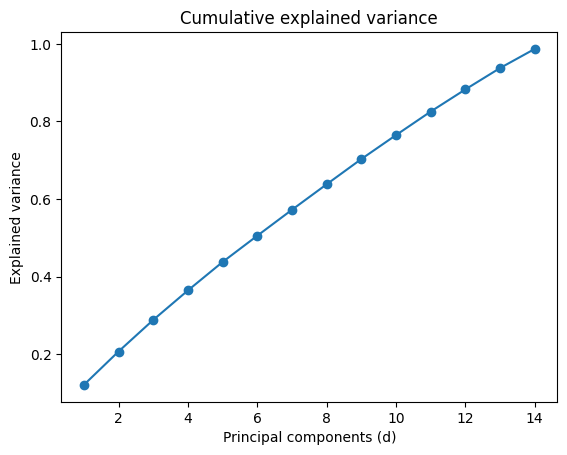

In [19]:
import matplotlib.pyplot as plt
import numpy as np

number_of_pca = np.arange(pca.n_components_) + 1
plt.plot(number_of_pca, cumulative_explained_variance, marker = 'o')
plt.title("Cumulative explained variance")
plt.xlabel('Principal components (d)')
plt.ylabel("Explained variance")
plt.show()

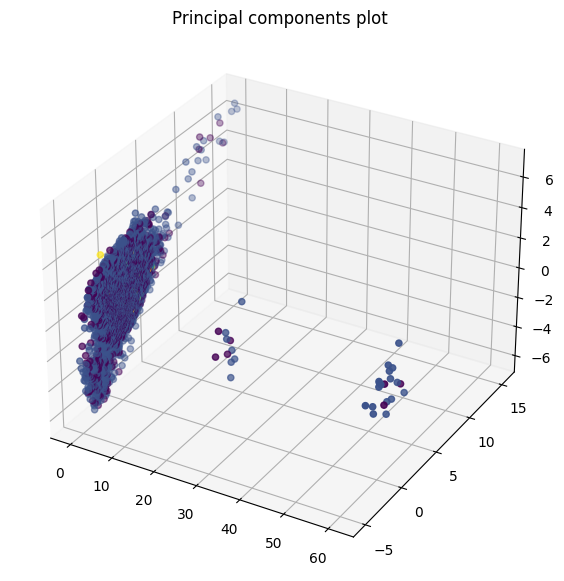

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(train_data_pca[:, 0], train_data_pca[:, 1], train_data_pca[:, 2], c=le.fit_transform(y_train), cmap='viridis')
plt.title("Principal components plot")
plt.show()

In [57]:
train_data_pca = pd.DataFrame(train_data_pca)
train_data_pca['perceived_gender'] = y_train


test_data_pca = pd.DataFrame(test_data_pca)
test_data_pca['perceived_gender'] = y_test

with open('train_data_pca.pickle', 'wb') as f:
    pickle.dump(train_data_pca, f)
    
with open('test_data_pca.pickle', 'wb') as f:
    pickle.dump(test_data_pca, f)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

train_data_lda = lda.fit_transform(X_train, y_train)
test_data_lda = lda.transform(X_test) 

train_data_lda = pd.DataFrame(train_data_lda)
train_data_lda['perceived_gender'] = y_train
test_data_lda = pd.DataFrame(test_data_lda)
test_data_lda['perceived_gender'] = y_test

with open('train_data_lda.pickle', 'wb') as f:
    pickle.dump(train_data_lda, f)
    
with open('test_data_lda.pickle', 'wb') as f:
    pickle.dump(test_data_lda, f)

### Clustering Models

In [6]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import pickle
import pandas as pd
import numpy as np

datasets = ['original', 'norm', 'std', 'pca', 'lda', 'downsampled', 'upsampled', 'smote']

def create_kmeans():
    return KMeans(n_clusters=5, random_state=1, n_init=10)

def create_dbscan():
    return DBSCAN(eps=5, min_samples=5)

def create_em():
    return GaussianMixture(n_components=5, random_state=1, n_init=10)

def create_agglo():
    return AgglomerativeClustering(n_clusters=5)

models = {
    'KMeans': create_kmeans,
    'DBSCAN': create_dbscan,
    'EM': create_em,
    'Agglomerative Clustering': create_agglo
}

In [2]:
trained_clusters = {
    'KMeans': [],
    'DBSCAN': [],
    'EM': [],
    'Agglomerative Clustering': []
}

for item in tqdm(list(itertools.product(models, datasets))):
    model_name = item[0]
    dataset_name = item[1]
    
    with open(f'train_data_{dataset_name}.pickle', 'rb') as f:
        X_train = pickle.load(f)
        X_train.pop('perceived_gender')
    
    #if model_name == 'Agglomerative Clustering':
    #    if type(X_train) == np.ndarray: X_train = pd.DataFrame(X_train)
    #    X_train = X_train.sample(frac=0.1) # Crashes due to memory otherwise
        
    model = models[model_name]()
    clusters = model.fit_predict(X_train)
    
    trained_clusters[model_name].append(clusters)

100%|██████████| 8/8 [04:14<00:00, 31.84s/it]


In [3]:
import pickle
with open('clusters.pickle', 'rb') as f:
    trained_clusters1 = pickle.load(f)
    del trained_clusters1['DBSCAN']
    trained_clusters.update(trained_clusters1)

In [4]:
with open('clusters.pickle', 'wb') as f:
    pickle.dump(trained_clusters, f)

In [60]:
import pickle
with open('clusters.pickle', 'rb') as f:
    trained_clusters = pickle.load(f)

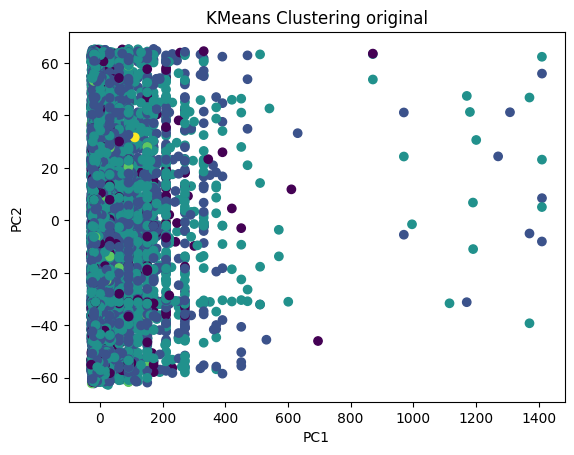

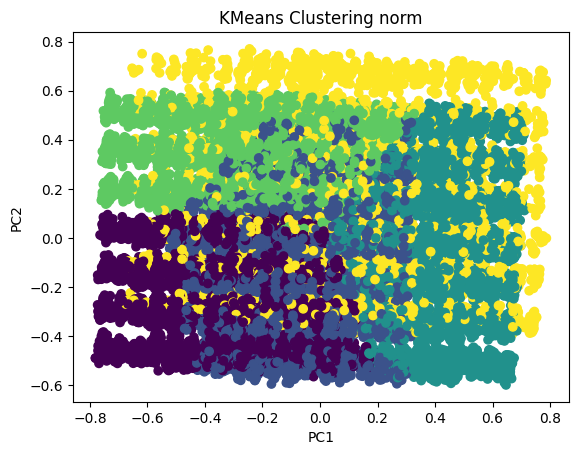

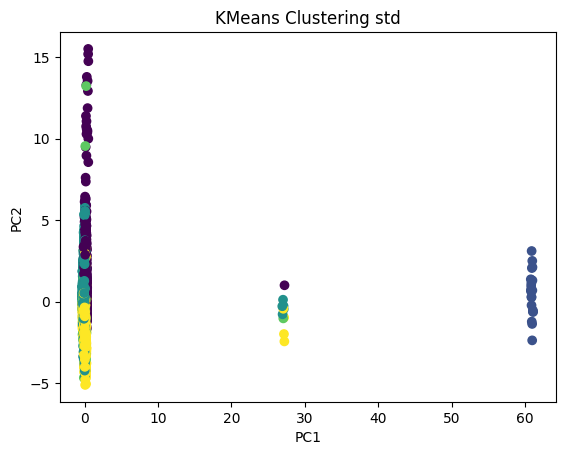

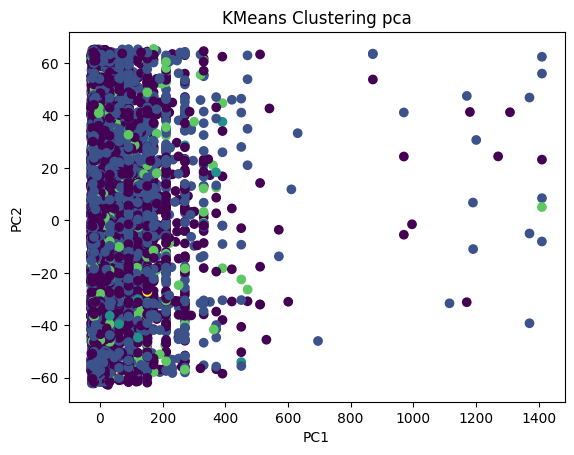

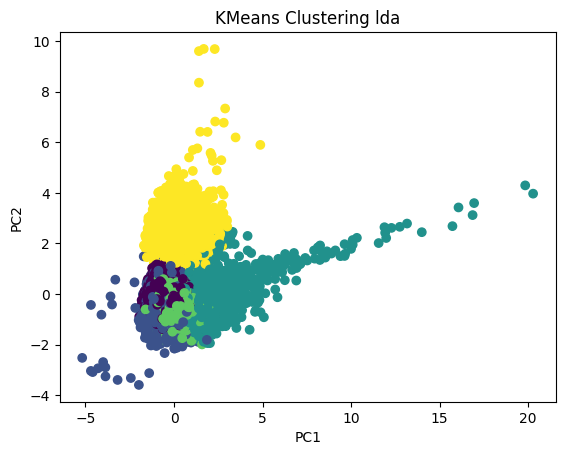

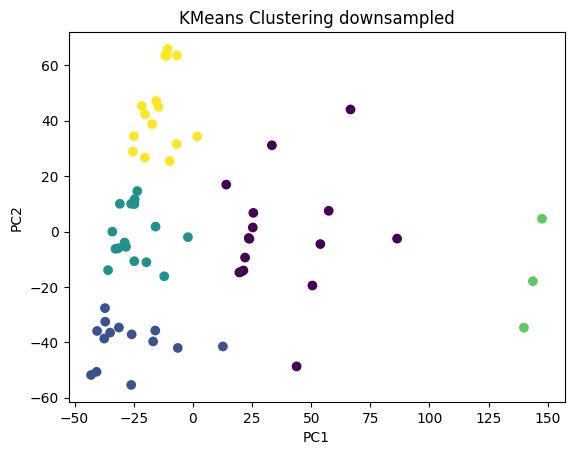

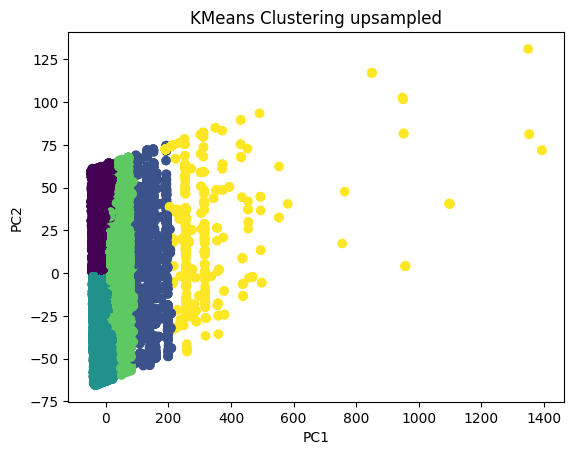

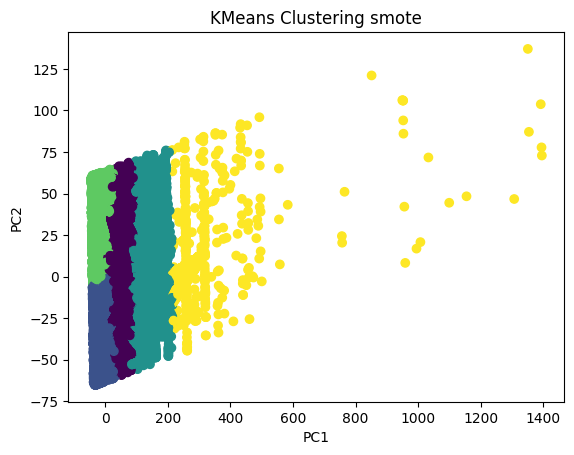

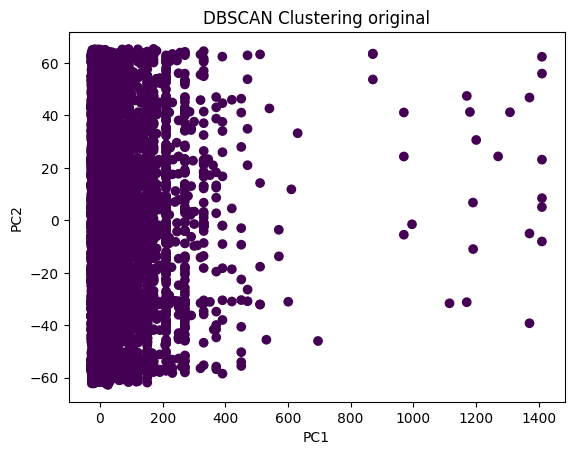

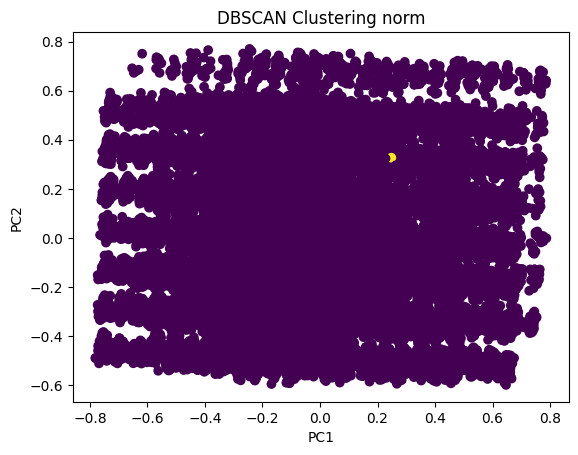

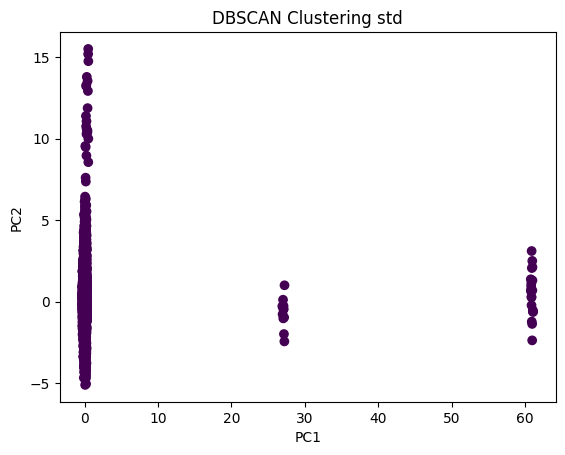

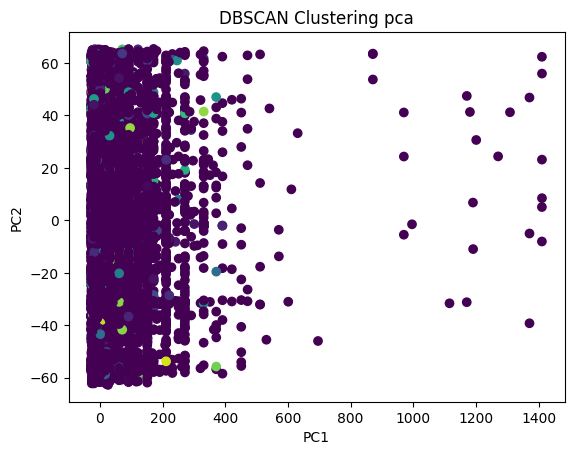

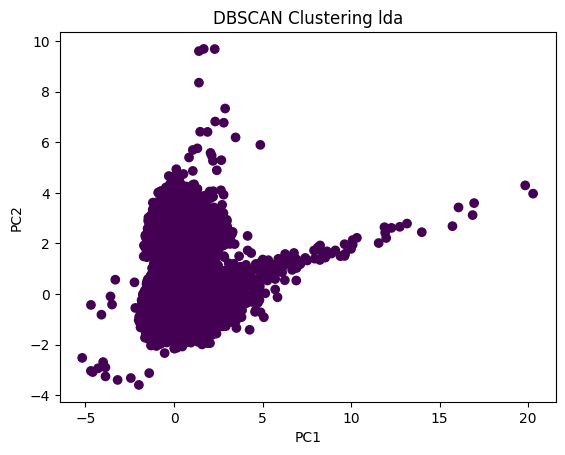

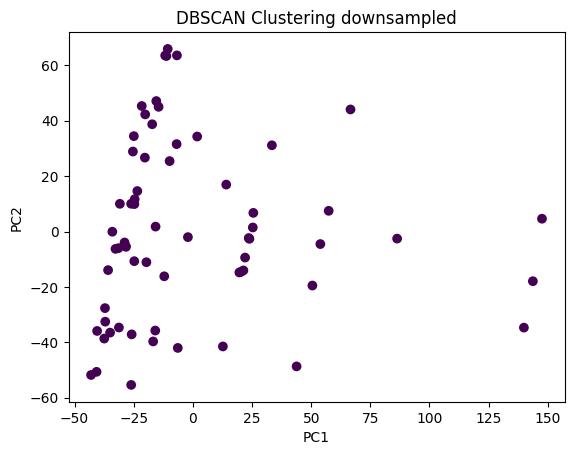

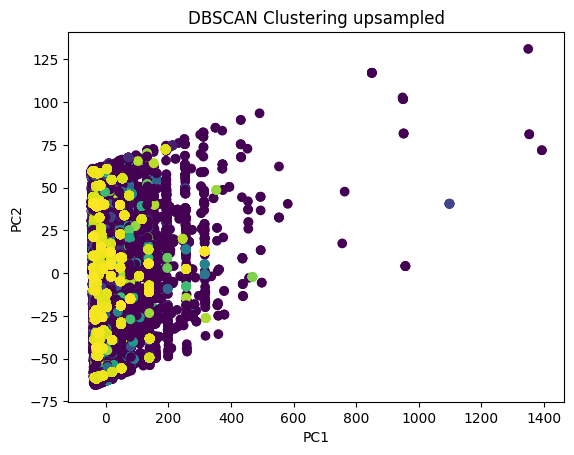

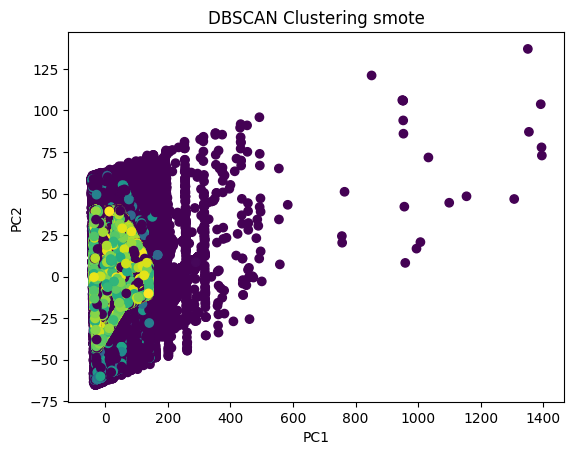

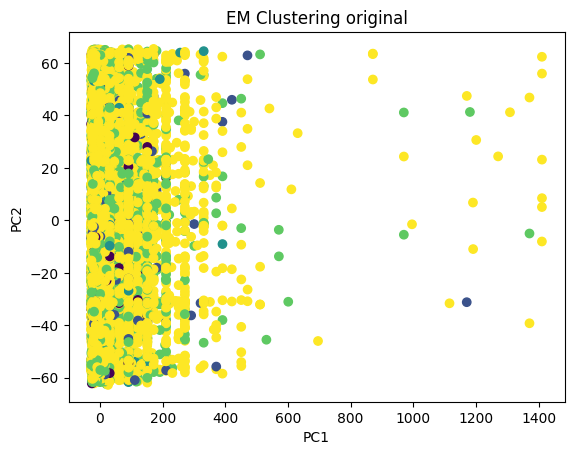

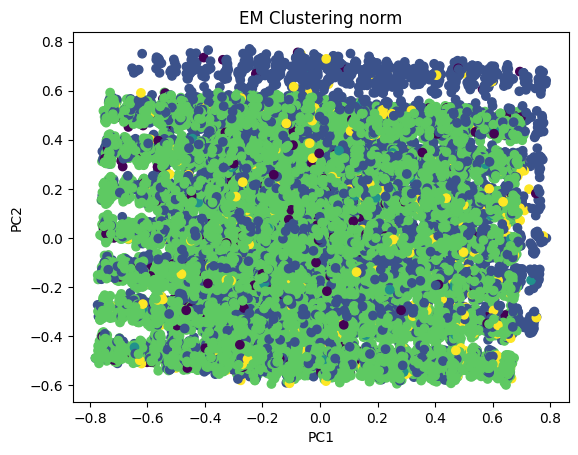

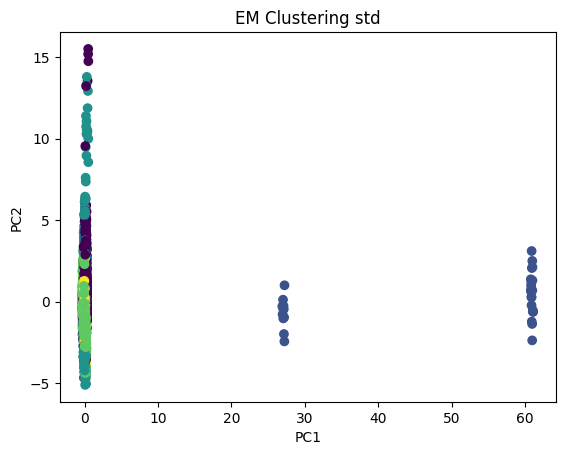

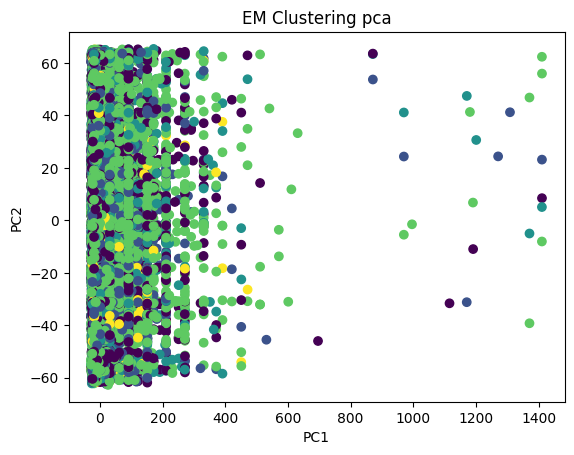

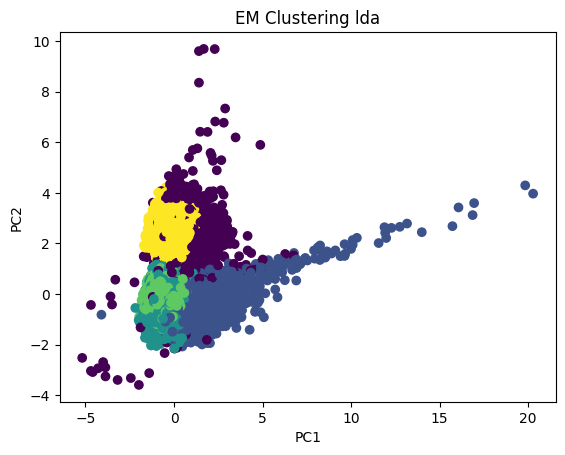

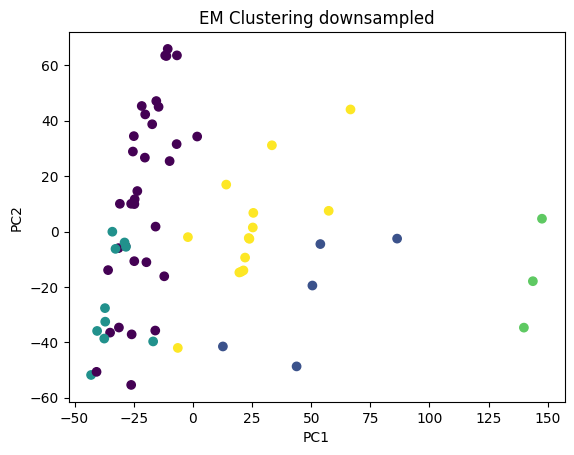

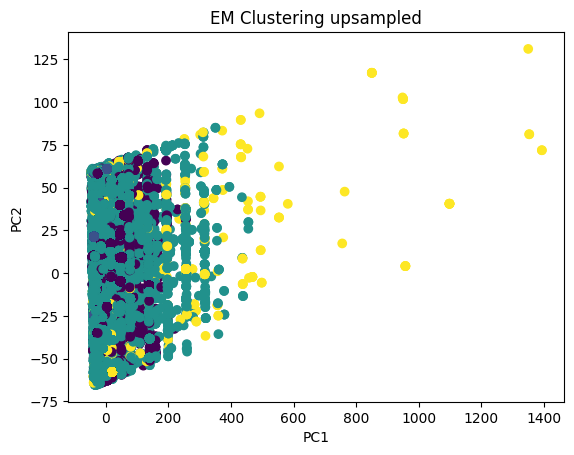

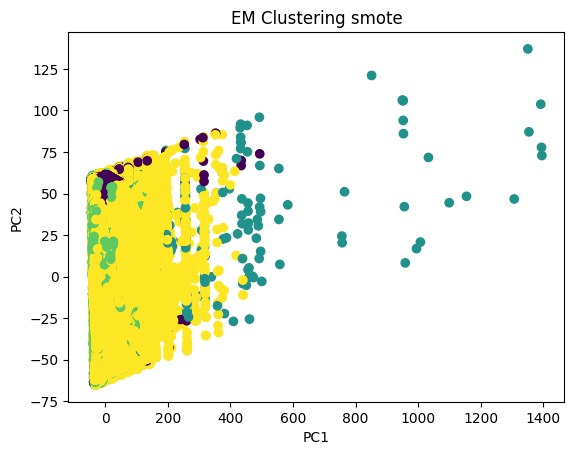

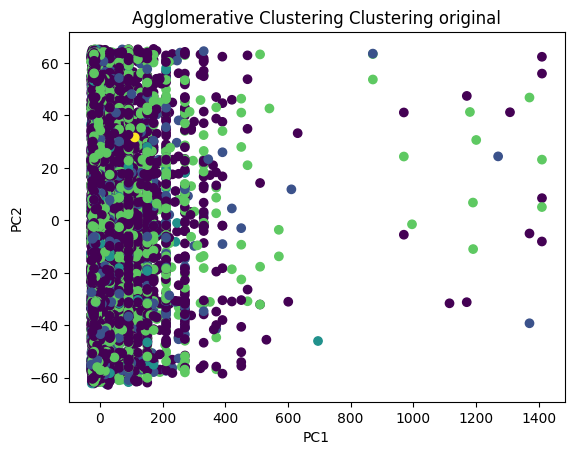

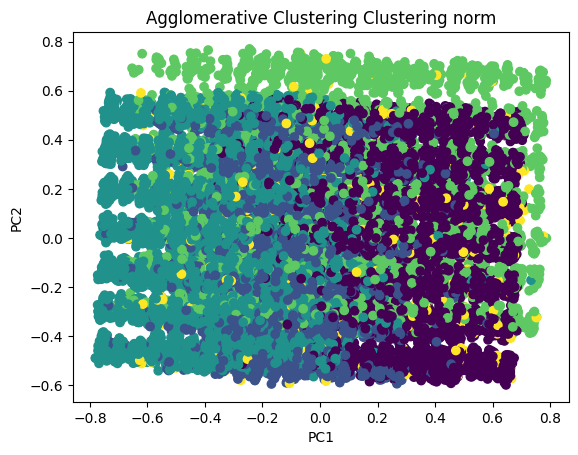

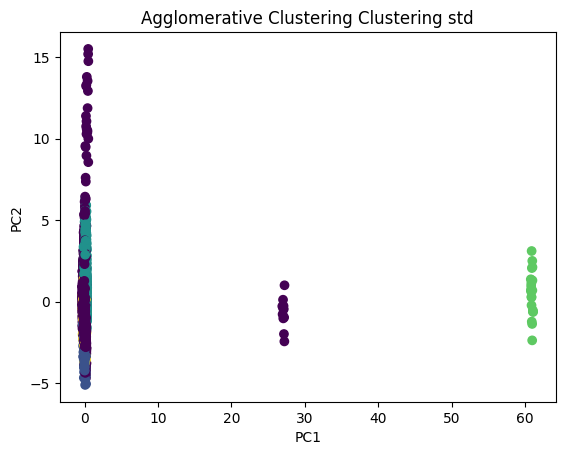

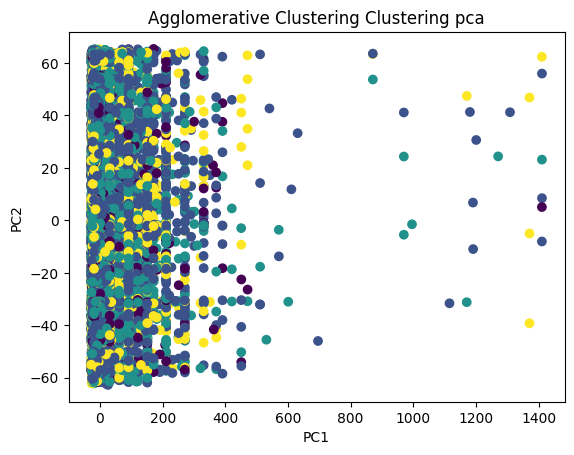

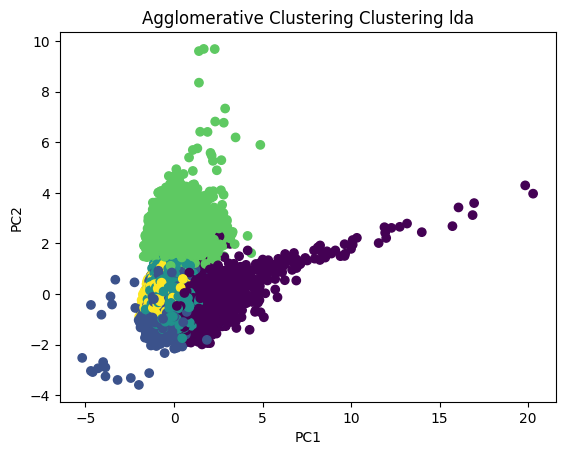

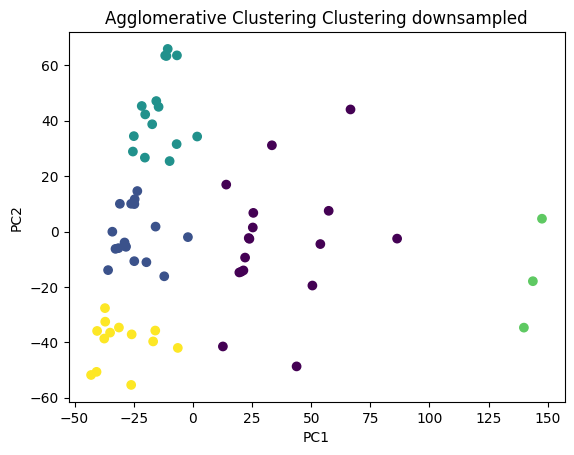

IndexError: list index out of range

In [64]:
from sklearn.decomposition import PCA
pca = PCA()

for model_name in models:
    for i, dataset_name in enumerate(datasets):
        with open(f'train_data_{dataset_name}.pickle', 'rb') as f:
            X_train = pickle.load(f)
            X_train.pop('perceived_gender')
            
        cluster = trained_clusters[model_name][i]
        
        X_pca = pca.fit_transform(X_train)
        plt.scatter(X_pca[:, 0],
                    X_pca[:, 1],
                    c=cluster)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title(f'{model_name} Clustering {dataset_name}')
        plt.show()

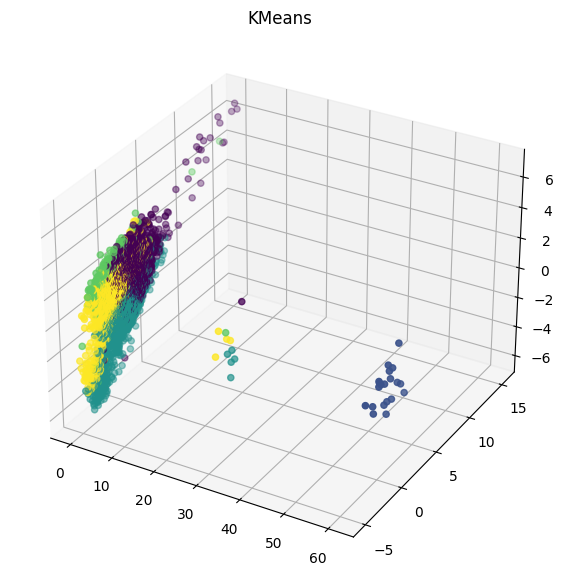

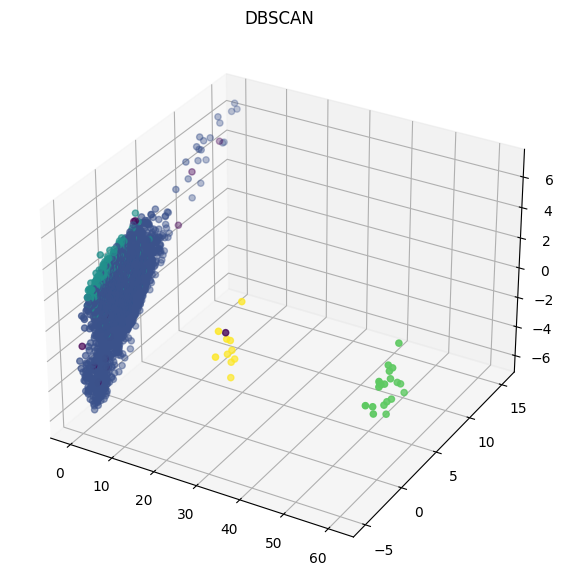

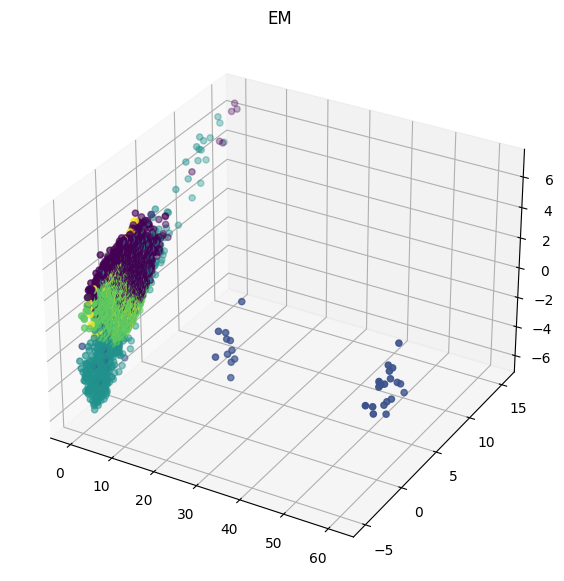

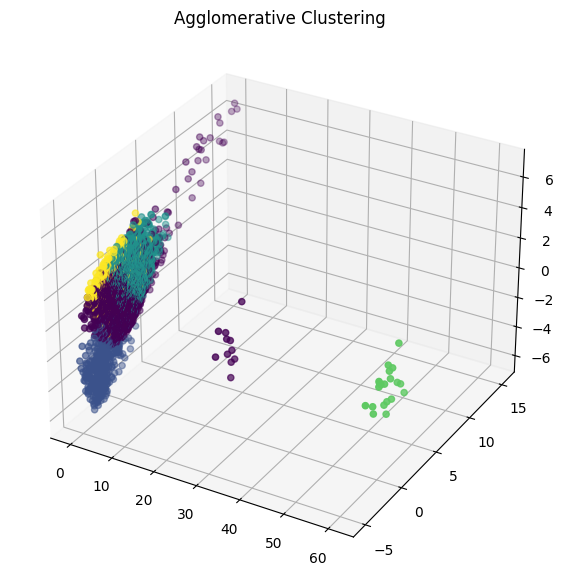

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
le = LabelEncoder()
pca = PCA()

for model_name in models:
    for i, dataset_name in enumerate(datasets):
        if dataset_name != 'std': continue
        with open(f'train_data_{dataset_name}.pickle', 'rb') as f:
            X_train = pickle.load(f)
            X_train.pop('perceived_gender')
            
        cluster = trained_clusters[model_name][i]
        
        X_pca = pca.fit_transform(X_train)        

        fig = plt.figure(figsize=(10, 7))
        ax = plt.axes(projection="3d")
        ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster, cmap='viridis')
        plt.title(f'{model_name} Clustering {dataset_name}')
        plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Instantiate outlier detection methods
lof = LocalOutlierFactor(n_neighbors=20)
isf = IsolationForest(contamination=0.1)
ocsvm = OneClassSVM(nu=0.01)

with open(f'train_data_std.pickle', 'rb') as f:
    X_train = pickle.load(f)
    X_train = X_train.drop('perceived_gender', axis=1)

data_outlier = X_train.copy()

# Fit the models and predict outliers
data_outlier['lof_outlier'] = lof.fit_predict(X_train.copy())
data_outlier['isf_outlier'] = isf.fit_predict(X_train.copy())
data_outlier['ocsvm_outlier'] = ocsvm.fit_predict(X_train.copy())
data_outlier['ensemble'] = data_outlier.apply(lambda row: 1 if row['lof_outlier'] + row['isf_outlier'] + row['ocsvm_outlier'] > 0 else -1, axis=1)

# Save the results as a CSV file
data_outlier.to_csv('dataset_with_outlier_detection.csv', index=False)

In [30]:
data.head()

exp_years  stopduration  stop_in_response_to_cfs  isschool  pid   
501233         11             8                        0         0    1  \
595037          3            10                        0         0    1   
136564          1           180                        0         0    1   
387692          2            15                        0         0    1   
39562           4            10                        0         0    4   

        isstudent  perceived_limited_english  perceived_age perceived_gender   
501233          0                          0             25           Female  \
595037          0                          0             30             Male   
136564          0                          0             31             Male   
387692          0                          0             23           Female   
39562           0                          0             45           Female   

        day_of_week  year_stop  month_stop  day_stop  hour_of_day   
501233            1       2022           1         4         15.0  \
595037            4       2022          11        18         17.0   
136564            6       2019           9        29          3.0   
387692            4       2021           3        12         18.0   
39562             0       2019           4        15         20.0   

        address_city_encoded  beat_name_encoded  
501233                    42                 66  
595037                    42                 78  
136564                    42                 60  
387692                    42                 75  
39562                     42                 30

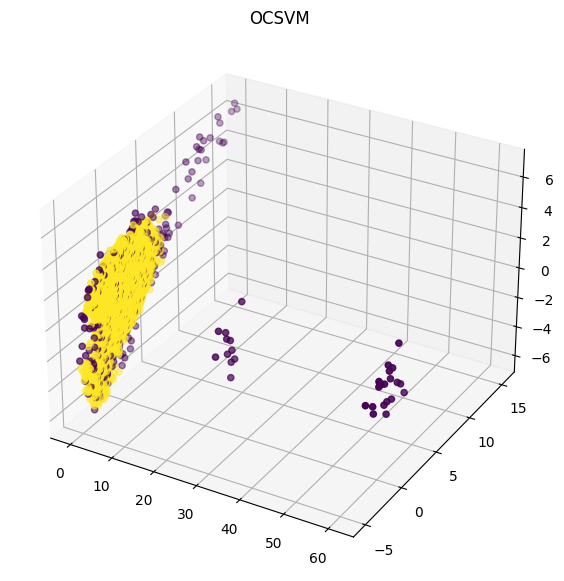

In [59]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data_outlier = pd.read_csv('dataset_with_outlier_detection.csv')
column_names = list(data.drop(['perceived_gender'], axis=1).columns) + list(data_outlier.columns[len(data.drop(['perceived_gender'], axis=1).columns):])
data_outlier.columns = column_names

norm_data = data_outlier.drop(['ensemble', 'lof_outlier', 'isf_outlier', 'ocsvm_outlier'], axis=1)

pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(norm_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=le.fit_transform(data_outlier['ocsvm_outlier']), cmap='viridis')
plt.title("OCSVM")
plt.show()

### Classification Models

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'kNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'Naive Bayes': GaussianNB,
    'SVM': SVC,
    'MLP': MLPClassifier
}

def calculate_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    
    model_results = {"Accuracy": accuracy,
                     "Precision": precision,
                     "Recall": recall,
                     "F1 Score": f1}
    return model_results

In [18]:
import itertools
from tqdm import tqdm
import pickle
datasets = ['original', 'norm', 'std', 'pca', 'lda', 'downsampled', 'upsampled', 'smote']

trained_classifier_models = {
    'kNN': [],
    'Decision Tree': [],
    'Random Forest': [],
    'Naive Bayes': [],
    'SVM': [],
    'MLP': []
}

classifier_performances = {
        'kNN': [],
        'Decision Tree': [],
        'Random Forest': [],
        'Naive Bayes': [],
        'SVM': [],
        'MLP': []
    }

for item in tqdm(list(itertools.product(models, datasets))):
    model_name = item[0]
    dataset_name = item[1]
    
    print(f"Training {model_name} on {dataset_name} dataset")
    
    with open(f'train_data_{dataset_name}.pickle', 'rb') as f:
        X_train = pickle.load(f)
        y_train = X_train['perceived_gender']
        X_train = X_train.drop('perceived_gender', axis=1)
        
    with open(f'test_data_{dataset_name}.pickle', 'rb') as f:
        X_test = pickle.load(f)
        y_test = X_test['perceived_gender']
        X_test = X_test.drop('perceived_gender', axis=1)
    
    model = models[model_name]()
    model.fit(X_train, y_train)
    trained_classifier_models[model_name].append(model)

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy scores
    performance = calculate_results(y_test, y_pred)
    print(f"F1 Score: {performance['F1 Score']:.4f}")
    
    classifier_performances[model_name].append(performance)

  0%|          | 0/48 [00:00<?, ?it/s]

Training kNN on original dataset


  2%|▏         | 1/48 [00:02<01:37,  2.07s/it]

F1 Score: 0.6348
Training kNN on norm dataset


  4%|▍         | 2/48 [00:12<05:27,  7.12s/it]

F1 Score: 0.6356
Training kNN on std dataset


  6%|▋         | 3/48 [00:30<09:08, 12.18s/it]

F1 Score: 0.6381
Training kNN on pca dataset


  8%|▊         | 4/48 [00:31<05:36,  7.64s/it]

F1 Score: 0.6351
Training kNN on lda dataset


 10%|█         | 5/48 [00:32<03:41,  5.16s/it]

F1 Score: 0.6342
Training kNN on downsampled dataset


 12%|█▎        | 6/48 [00:32<02:31,  3.61s/it]

F1 Score: 0.4276
Training kNN on upsampled dataset


 15%|█▍        | 7/48 [00:36<02:21,  3.46s/it]

F1 Score: 0.5519
Training kNN on smote dataset


 17%|█▋        | 8/48 [00:39<02:21,  3.54s/it]

F1 Score: 0.5374
Training Decision Tree on original dataset


 19%|█▉        | 9/48 [00:40<01:42,  2.62s/it]

F1 Score: 0.6099
Training Decision Tree on norm dataset


 21%|██        | 10/48 [00:41<01:15,  1.99s/it]

F1 Score: 0.6131
Training Decision Tree on std dataset


 23%|██▎       | 11/48 [00:41<00:57,  1.57s/it]

F1 Score: 0.6134
Training Decision Tree on pca dataset


 25%|██▌       | 12/48 [00:42<00:46,  1.29s/it]

F1 Score: 0.6101
Training Decision Tree on lda dataset


 27%|██▋       | 13/48 [00:43<00:40,  1.15s/it]

F1 Score: 0.6056
Training Decision Tree on downsampled dataset


 29%|██▉       | 14/48 [00:43<00:30,  1.12it/s]

F1 Score: 0.3438
Training Decision Tree on upsampled dataset


 31%|███▏      | 15/48 [00:44<00:32,  1.03it/s]

F1 Score: 0.5849
Training Decision Tree on smote dataset


 33%|███▎      | 16/48 [00:46<00:37,  1.16s/it]

F1 Score: 0.5825
Training Random Forest on original dataset


 35%|███▌      | 17/48 [00:52<01:25,  2.76s/it]

F1 Score: 0.6312
Training Random Forest on norm dataset


 38%|███▊      | 18/48 [00:59<01:55,  3.86s/it]

F1 Score: 0.6394
Training Random Forest on std dataset


 40%|███▉      | 19/48 [01:05<02:14,  4.64s/it]

F1 Score: 0.6403
Training Random Forest on pca dataset


 42%|████▏     | 20/48 [01:17<03:15,  6.99s/it]

F1 Score: 0.6394
Training Random Forest on lda dataset


 44%|████▍     | 21/48 [01:39<05:06, 11.36s/it]

F1 Score: 0.6291
Training Random Forest on downsampled dataset


 46%|████▌     | 22/48 [01:40<03:31,  8.12s/it]

F1 Score: 0.3872
Training Random Forest on upsampled dataset


 48%|████▊     | 23/48 [01:55<04:19, 10.37s/it]

F1 Score: 0.6481
Training Random Forest on smote dataset


 50%|█████     | 24/48 [02:18<05:37, 14.07s/it]

F1 Score: 0.6335
Training Naive Bayes on original dataset


 52%|█████▏    | 25/48 [02:18<03:48,  9.95s/it]

F1 Score: 0.0655
Training Naive Bayes on norm dataset


 54%|█████▍    | 26/48 [02:19<02:35,  7.06s/it]

F1 Score: 0.0266
Training Naive Bayes on std dataset


 56%|█████▋    | 27/48 [02:19<01:45,  5.04s/it]

F1 Score: 0.0266
Training Naive Bayes on pca dataset


 58%|█████▊    | 28/48 [02:19<01:12,  3.62s/it]

F1 Score: 0.6142
Training Naive Bayes on lda dataset


 60%|██████    | 29/48 [02:19<00:49,  2.62s/it]

F1 Score: 0.6171
Training Naive Bayes on downsampled dataset


 62%|██████▎   | 30/48 [02:20<00:34,  1.91s/it]

F1 Score: 0.2206
Training Naive Bayes on upsampled dataset


 65%|██████▍   | 31/48 [02:20<00:25,  1.47s/it]

F1 Score: 0.0240
Training Naive Bayes on smote dataset


 67%|██████▋   | 32/48 [02:21<00:18,  1.17s/it]

F1 Score: 0.0698
Training SVM on original dataset


 69%|██████▉   | 33/48 [03:28<05:17, 21.15s/it]

F1 Score: 0.6085
Training SVM on norm dataset


 71%|███████   | 34/48 [09:02<26:48, 114.88s/it]

F1 Score: 0.6146
Training SVM on std dataset


 73%|███████▎  | 35/48 [20:45<1:03:06, 291.24s/it]

F1 Score: 0.6146
Training SVM on pca dataset


 75%|███████▌  | 36/48 [22:04<45:31, 227.63s/it]  

F1 Score: 0.6146
Training SVM on lda dataset


 77%|███████▋  | 37/48 [24:31<37:18, 203.51s/it]

F1 Score: 0.6146
Training SVM on downsampled dataset


 79%|███████▉  | 38/48 [24:32<23:45, 142.58s/it]

F1 Score: 0.4740
Training SVM on upsampled dataset


 81%|████████▏ | 39/48 [59:17<1:48:47, 725.32s/it]

F1 Score: 0.4734
Training SVM on smote dataset


 83%|████████▎ | 40/48 [1:35:42<2:35:06, 1163.36s/it]

F1 Score: 0.3771
Training MLP on original dataset


 85%|████████▌ | 41/48 [1:35:57<1:35:32, 818.86s/it] 

F1 Score: 0.6089
Training MLP on norm dataset


 88%|████████▊ | 42/48 [1:36:32<58:22, 583.80s/it]  

F1 Score: 0.6158
Training MLP on std dataset


 90%|████████▉ | 43/48 [1:37:01<34:45, 417.14s/it]

F1 Score: 0.6249
Training MLP on pca dataset


 92%|█████████▏| 44/48 [1:37:11<19:39, 294.95s/it]

F1 Score: 0.6153
Training MLP on lda dataset


 94%|█████████▍| 45/48 [1:37:18<10:26, 208.70s/it]

F1 Score: 0.6146
Training MLP on downsampled dataset


 96%|█████████▌| 46/48 [1:37:18<04:52, 146.17s/it]

F1 Score: 0.5401
Training MLP on upsampled dataset


c:\Users\Rafael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|█████████▊| 47/48 [1:39:36<02:23, 143.70s/it]

F1 Score: 0.3415
Training MLP on smote dataset


c:\Users\Rafael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 48/48 [1:41:54<00:00, 127.39s/it]

F1 Score: 0.4462


In [19]:
with open('classification_models.pickle', 'wb') as f:
    pickle.dump(trained_classifier_models, f)

with open('classification_performance.pickle', 'wb') as f:
    pickle.dump(classifier_performances, f)

In [21]:
import pickle
with open('classification_models.pickle', 'rb') as f:
    trained_classifier_models = pickle.load(f)
    
with open('classification_performance.pickle', 'rb') as f:
    classifier_performances = pickle.load(f)

In [23]:
import pandas as pd

datasets = ['original', 'norm', 'std', 'pca', 'lda', 'downsampled', 'upsampled', 'smote']
classifier_performances
for model in classifier_performances:
    classifier_performances[model] = pd.DataFrame.from_records(classifier_performances[model_name], index=datasets)

In [28]:
df = pd.concat(classifier_performances.values(), axis=1)
keys = list(classifier_performances.keys())

# Create a new list of column names with the key names prefixed
new_columns = [f"{key} {col}" for key in keys for col in classifier_performances[key].columns]

df.columns = new_columns
df.to_csv('results.csv', index=False)

In [26]:
import pandas as pd

for model_name in models:
    print('-------------------------------------------------------')
    print(model_name)
    print(pd.DataFrame.from_records(classifier_performances[model_name], index=datasets))

-------------------------------------------------------
kNN
             Accuracy  Precision    Recall  F1 Score
original     0.675303   0.617464  0.675303  0.634751
norm         0.675303   0.616827  0.675303  0.635576
std          0.679588   0.619756  0.679588  0.638065
pca          0.675507   0.616102  0.675507  0.635053
lda          0.675916   0.614803  0.675916  0.634157
downsampled  0.347292   0.602548  0.347292  0.427630
upsampled    0.526063   0.611254  0.526063  0.551931
smote        0.499745   0.614424  0.499745  0.537416
-------------------------------------------------------
Decision Tree
             Accuracy  Precision    Recall  F1 Score
original     0.605631   0.614531  0.605631  0.609884
norm         0.607161   0.619765  0.607161  0.613068
std          0.607161   0.620447  0.607161  0.613372
pca          0.605988   0.614584  0.605988  0.610097
lda          0.603999   0.607360  0.603999  0.605643
downsampled  0.254718   0.594254  0.254718  0.343814
upsampled    0.569418 

In [44]:
f1_scores = {}
for model_name in models:
    performance = pd.DataFrame.from_records(classifier_performances[model_name], index=datasets)
    f1_scores[model_name] = performance['F1 Score']
    
all_f1_scores = pd.DataFrame(f1_scores)

all_f1_scores = all_f1_scores.sort_values(by='kNN', ascending=False)

all_f1_scores

kNN  Decision Tree  Random Forest  Naive Bayes       SVM   
std          0.638065       0.613372       0.640339     0.026583  0.614638  \
norm         0.635576       0.613068       0.639412     0.026583  0.614618   
pca          0.635053       0.610097       0.639405     0.614197  0.614593   
original     0.634751       0.609884       0.631203     0.065481  0.608516   
lda          0.634157       0.605643       0.629069     0.617061  0.614618   
upsampled    0.551931       0.584876       0.648088     0.024041  0.473429   
smote        0.537416       0.582452       0.633477     0.069767  0.377149   
downsampled  0.427630       0.343814       0.387164     0.220592  0.473959   

                  MLP  
std          0.624920  
norm         0.615841  
pca          0.615346  
original     0.608950  
lda          0.614618  
upsampled    0.341477  
smote        0.446206  
downsampled  0.540119

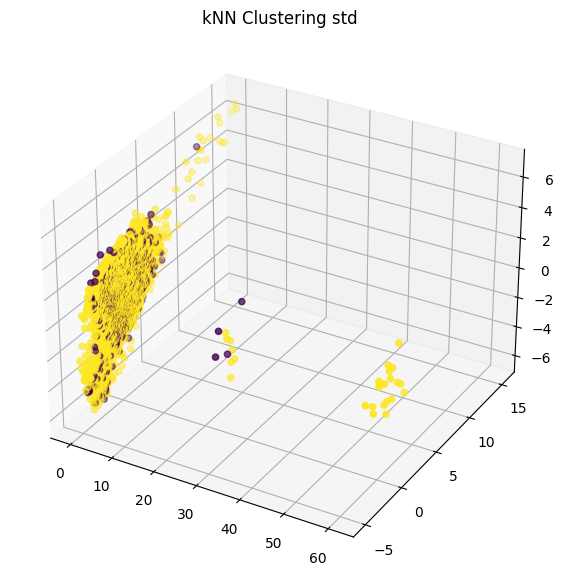

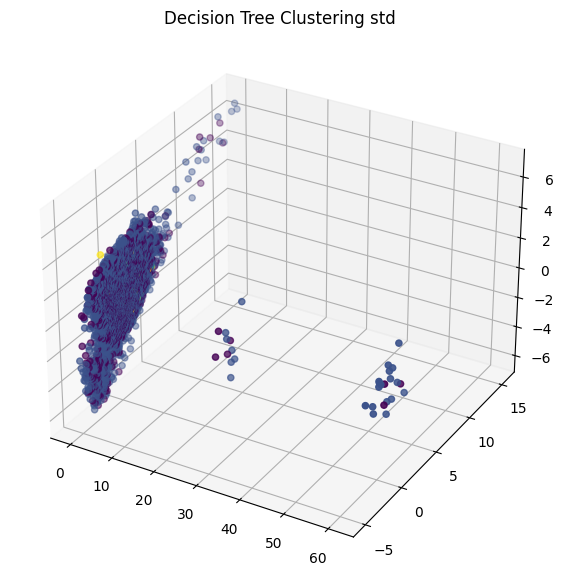

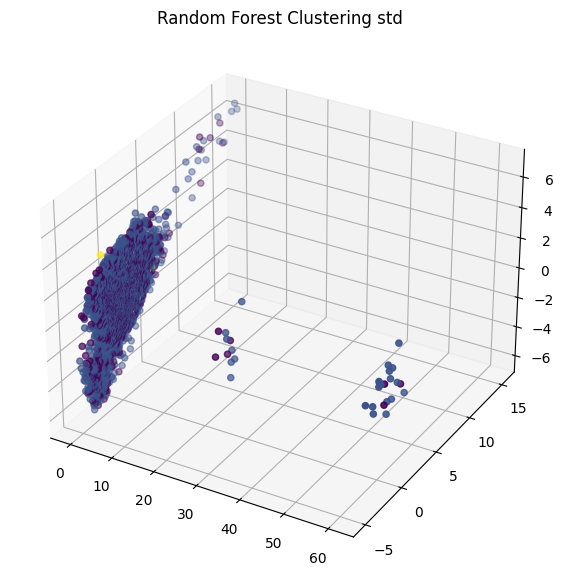

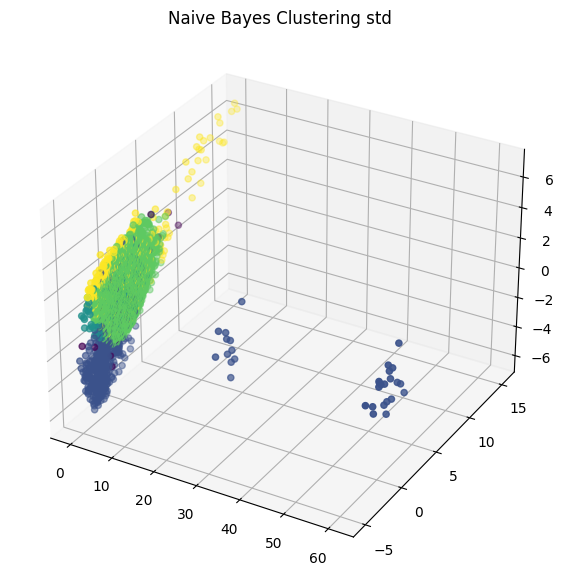

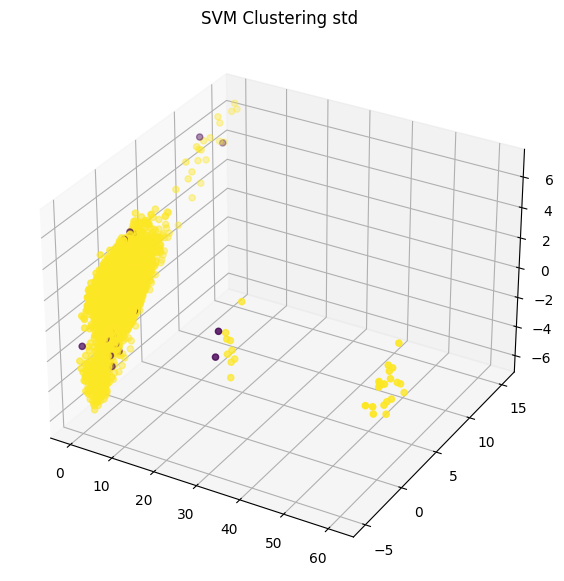

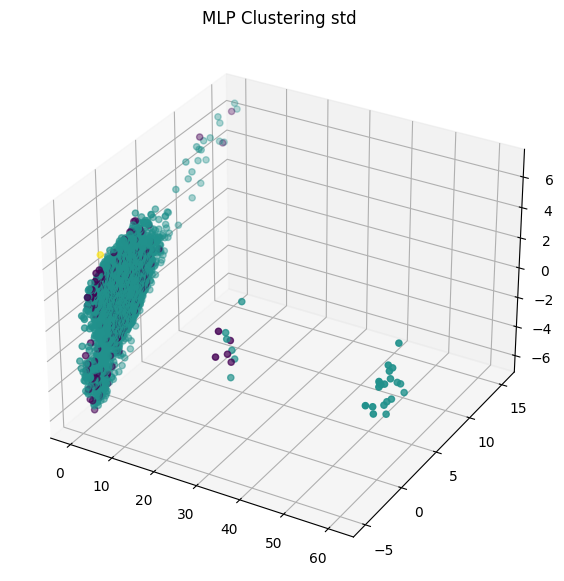

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
le = LabelEncoder()
pca = PCA()

for model_name in trained_classifier_models:
    for i, dataset_name in enumerate(datasets):
        if dataset_name != 'std': continue
        with open(f'train_data_{dataset_name}.pickle', 'rb') as f:
            X_test = pickle.load(f)
            X_test.pop('perceived_gender')
            
        y_pred = trained_classifier_models[model_name][i].predict(X_test)
        
        X_pca = pca.fit_transform(X_test)        

        fig = plt.figure(figsize=(10, 7))
        ax = plt.axes(projection="3d")
        ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=le.fit_transform(y_pred), cmap='viridis')
        plt.title(f'{model_name} Clustering {dataset_name}')
        plt.show()